In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
import re
import seaborn as sns
%matplotlib inline

In [3]:
def average_minutes(data, activity_code):
    activity_col = "{}".format(activity_code)
    data = data[['weight', activity_col]]
    data = data.rename(columns={activity_col: "minutes"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

In [4]:
respondent = pd.read_csv("atusresp_2013/atusresp_2013.dat")
weight = respondent[["TUCASEID", "TRSPPRES", "TUFINLWGT", "TULINENO"]]

activity_sum = pd.read_csv("atussum_2013/atussum_2013.dat")
activity_sum = activity_sum.rename(columns = {"tucaseid": "TUCASEID"})

marital_status = pd.read_csv("atuscps_2013/atuscps_2013.dat")
marital_status = marital_status[["TUCASEID","TULINENO", "PEMARITL"]]

roster = pd.read_csv("atusrost_2013/atusrost_2013.dat")

activity = pd.read_csv("atusact_2013/atusact_2013.dat")

needed_data = pd.merge(respondent, activity_sum, how="inner", on="TUCASEID")
needed_data = pd.merge(needed_data, roster, how="inner", on=["TUCASEID", "TULINENO"])
needed_data = pd.merge(needed_data, marital_status, how="inner", on=["TUCASEID", "TULINENO"])

In [5]:
under18 = needed_data.TEAGE_x <= 18
over18 = needed_data.TEAGE_x > 18
under65 = needed_data.TEAGE_x < 65
over65 = needed_data.TEAGE_x >= 65
male = needed_data.TESEX_x == 1
female = needed_data.TESEX_x == 2

In [6]:
watching_sports = needed_data[["TUFINLWGT_x", "TESEX_x", "PEMARITL", "TEAGE_x", "TRHHCHILD",  't130202', 't130203', 't130205', 't130206', 't130207', 't130210', 't130213', 't130215', 't130216', 't130218', 't130219', 't130220', 't130221', 't130222', 't130223', 't130224', 't130225', 't130226', 't130227', 't130229', 't130232']]
watching_sports = watching_sports.rename(columns={"TUFINLWGT_x": "weight", 
                                                  "TESEX_x": "sex", "PEMARITL": "marriage_status", "TEAGE_x": "age", 
                                                  "TRHHCHILD":"children", 't130202': "baseball", 't130203': "basketball", 't130205': "billiards", 't130206': "boating", 't130207': "bowling", 't130210': "equestrian", 't130213': "football", 't130215': "gymnastics", 't130216': "hockey", 't130218': "racquet", 't130219': "rodeo", 't130220': "rollerblading", 't130221': "rugby", 't130222': "running", 't130223': "winter_sports", 't130224': "soccer", 't130225': "softball", 't130226': "racing", 't130227': "volleyball", 't130229': "water_sports", 't130232': "wrestling"})

sports_name = ["baseball", "basketball", "billiards", "boating", "bowling", "equestrian", "football", "gymnastics", "hockey", "racquet", "rodeo", "rollerblading", "rugby", "running", "winter_sports", "soccer", "softball", "racing", "volleyball", "water_sports", "wrestling"]

In [7]:
for num in range(len(sports_name)):
    watching_sports["weighted_time_" + sports_name[num]] = watching_sports.weight * watching_sports[sports_name[num]]
    
watching_sports_wt = watching_sports[['weighted_time_baseball', 'weighted_time_basketball',
                                   'weighted_time_billiards', 'weighted_time_boating',
                                   'weighted_time_bowling', 'weighted_time_equestrian',
                                   'weighted_time_football', 'weighted_time_gymnastics',
                                   'weighted_time_hockey', 'weighted_time_racquet',
                                   'weighted_time_rodeo', 'weighted_time_rollerblading',
                                   'weighted_time_rugby', 'weighted_time_running',
                                   'weighted_time_winter_sports', 'weighted_time_soccer',
                                   'weighted_time_softball', 'weighted_time_racing',
                                   'weighted_time_volleyball', 'weighted_time_water_sports',
                                   'weighted_time_wrestling']]

watching_sports_wtsum = watching_sports_wt.sum()

watching_sports_wtsum = pd.DataFrame(watching_sports_wtsum, columns = ["weighted_time"])

watching_sports_wtsum = (watching_sports_wtsum.weighted_time / watching_sports.weight.sum())

In [8]:
watching_sports_wtsum = pd.DataFrame(watching_sports_wtsum)

In [9]:
men_under18 = watching_sports[male & under18]
men_working = watching_sports[male & over18 & under65]
men_retired = watching_sports[male & over65]
women_under18 = watching_sports[female & under18]
women_working = watching_sports[female & over18 & under65]
women_retired = watching_sports[female & over65]

In [9]:
for num in range(len(sports_name)):
    men_under18["weighted_time_" + sports_name[num]] = men_under18.weight * men_under18[sports_name[num]]
    
men_under18_wt = men_under18[['weighted_time_baseball', 'weighted_time_basketball',
                           'weighted_time_billiards', 'weighted_time_boating',
                           'weighted_time_bowling', 'weighted_time_equestrian',
                           'weighted_time_football', 'weighted_time_gymnastics',
                           'weighted_time_hockey', 'weighted_time_racquet',
                           'weighted_time_rodeo', 'weighted_time_rollerblading',
                           'weighted_time_rugby', 'weighted_time_running',
                           'weighted_time_winter_sports', 'weighted_time_soccer',
                           'weighted_time_softball', 'weighted_time_racing',
                           'weighted_time_volleyball', 'weighted_time_water_sports',
                           'weighted_time_wrestling']]

men_under18_wtsum = men_under18_wt.sum()

men_under18_wtsum = pd.DataFrame(men_under18_wtsum, columns = ["men"])

men_under18_wtsum = (men_under18_wtsum.men / watching_sports.weight.sum())

men_under18_wtsum = pd.DataFrame(men_under18_wtsum)


for num in range(len(sports_name)):
    women_under18["weighted_time_" + sports_name[num]] = women_under18.weight * women_under18[sports_name[num]]
    
women_under18_wt = women_under18[['weighted_time_baseball', 'weighted_time_basketball',
                               'weighted_time_billiards', 'weighted_time_boating',
                               'weighted_time_bowling', 'weighted_time_equestrian',
                               'weighted_time_football', 'weighted_time_gymnastics',
                               'weighted_time_hockey', 'weighted_time_racquet',
                               'weighted_time_rodeo', 'weighted_time_rollerblading',
                               'weighted_time_rugby', 'weighted_time_running',
                               'weighted_time_winter_sports', 'weighted_time_soccer',
                               'weighted_time_softball', 'weighted_time_racing',
                               'weighted_time_volleyball', 'weighted_time_water_sports',
                               'weighted_time_wrestling']]

women_under18_wtsum = women_under18_wt.sum()

women_under18_wtsum = pd.DataFrame(women_under18_wtsum, columns = ["women"])

women_under18_wtsum = (women_under18_wtsum.women / watching_sports.weight.sum())

women_under18_wtsum = pd.DataFrame(women_under18_wtsum)


for num in range(len(sports_name)):
    men_working["weighted_time_" + sports_name[num]] = men_working.weight * men_working[sports_name[num]]
    
men_working_wt = men_working[['weighted_time_baseball', 'weighted_time_basketball',
                           'weighted_time_billiards', 'weighted_time_boating',
                           'weighted_time_bowling', 'weighted_time_equestrian',
                           'weighted_time_football', 'weighted_time_gymnastics',
                           'weighted_time_hockey', 'weighted_time_racquet',
                           'weighted_time_rodeo', 'weighted_time_rollerblading',
                           'weighted_time_rugby', 'weighted_time_running',
                           'weighted_time_winter_sports', 'weighted_time_soccer',
                           'weighted_time_softball', 'weighted_time_racing',
                           'weighted_time_volleyball', 'weighted_time_water_sports',
                           'weighted_time_wrestling']]

men_working_wtsum = men_working_wt.sum()

men_working_wtsum = pd.DataFrame(men_working_wtsum, columns = ["men"])

men_working_wtsum = (men_working_wtsum.men / watching_sports.weight.sum())

men_working_wtsum = pd.DataFrame(men_working_wtsum)


for num in range(len(sports_name)):
    women_working["weighted_time_" + sports_name[num]] = women_working.weight * women_working[sports_name[num]]
    
women_working_wt = women_working[['weighted_time_baseball', 'weighted_time_basketball',
                               'weighted_time_billiards', 'weighted_time_boating',
                               'weighted_time_bowling', 'weighted_time_equestrian',
                               'weighted_time_football', 'weighted_time_gymnastics',
                               'weighted_time_hockey', 'weighted_time_racquet',
                               'weighted_time_rodeo', 'weighted_time_rollerblading',
                               'weighted_time_rugby', 'weighted_time_running',
                               'weighted_time_winter_sports', 'weighted_time_soccer',
                               'weighted_time_softball', 'weighted_time_racing',
                               'weighted_time_volleyball', 'weighted_time_water_sports',
                               'weighted_time_wrestling']]

women_working_wtsum = women_working_wt.sum()

women_working_wtsum = pd.DataFrame(women_working_wtsum, columns = ["women"])

women_working_wtsum = (women_working_wtsum.women / watching_sports.weight.sum())

women_working_wtsum = pd.DataFrame(women_working_wtsum)


for num in range(len(sports_name)):
    men_retired["weighted_time_" + sports_name[num]] = men_retired.weight * men_retired[sports_name[num]]
    
men_retired_wt = men_retired[['weighted_time_baseball', 'weighted_time_basketball',
                           'weighted_time_billiards', 'weighted_time_boating',
                           'weighted_time_bowling', 'weighted_time_equestrian',
                           'weighted_time_football', 'weighted_time_gymnastics',
                           'weighted_time_hockey', 'weighted_time_racquet',
                           'weighted_time_rodeo', 'weighted_time_rollerblading',
                           'weighted_time_rugby', 'weighted_time_running',
                           'weighted_time_winter_sports', 'weighted_time_soccer',
                           'weighted_time_softball', 'weighted_time_racing',
                           'weighted_time_volleyball', 'weighted_time_water_sports',
                           'weighted_time_wrestling']]

men_retired_wtsum = men_retired_wt.sum()

men_retired_wtsum = pd.DataFrame(men_retired_wtsum, columns = ["men"])

men_retired_wtsum = (men_retired_wtsum.men / watching_sports.weight.sum())

men_retired_wtsum = pd.DataFrame(men_retired_wtsum)

for num in range(len(sports_name)):
    women_retired["weighted_time_" + sports_name[num]] = women_retired.weight * women_retired[sports_name[num]]
    
women_retired_wt = women_retired[['weighted_time_baseball', 'weighted_time_basketball',
                               'weighted_time_billiards', 'weighted_time_boating',
                               'weighted_time_bowling', 'weighted_time_equestrian',
                               'weighted_time_football', 'weighted_time_gymnastics',
                               'weighted_time_hockey', 'weighted_time_racquet',
                               'weighted_time_rodeo', 'weighted_time_rollerblading',
                               'weighted_time_rugby', 'weighted_time_running',
                               'weighted_time_winter_sports', 'weighted_time_soccer',
                               'weighted_time_softball', 'weighted_time_racing',
                               'weighted_time_volleyball', 'weighted_time_water_sports',
                               'weighted_time_wrestling']]

women_retired_wtsum = women_retired_wt.sum()

women_retired_wtsum = pd.DataFrame(women_retired_wtsum, columns = ["women"])

women_retired_wtsum = (women_retired_wtsum.women / watching_sports.weight.sum())

women_retired_wtsum = pd.DataFrame(women_retired_wtsum)

/Users/MatthewBarnette/iron_yard_hw/atus-analysis/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/MatthewBarnette/iron_yard_hw/atus-analysis/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/MatthewBarnette/iron_yard_hw/atus-analysis/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:50: SettingWithCopyWarning: 
A value is

In [10]:
under_18 = women_under18_wtsum.join(men_under18_wtsum)

In [11]:
working = women_working_wtsum.join(men_working_wtsum)

In [12]:
retired = women_retired_wtsum.join(men_retired_wtsum)

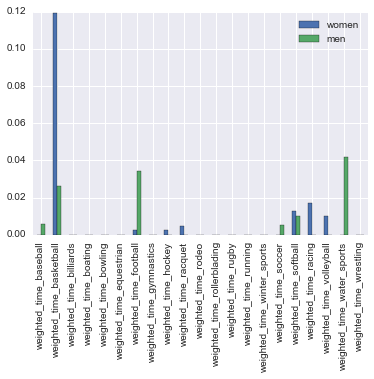

In [13]:
under_18.plot(kind="bar")

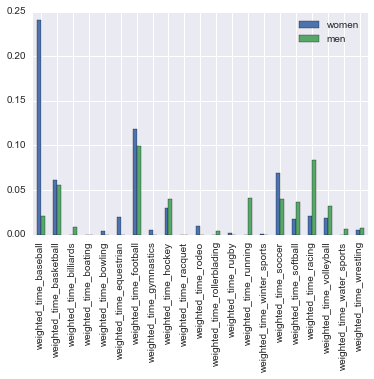

In [14]:
working.plot(kind="bar")

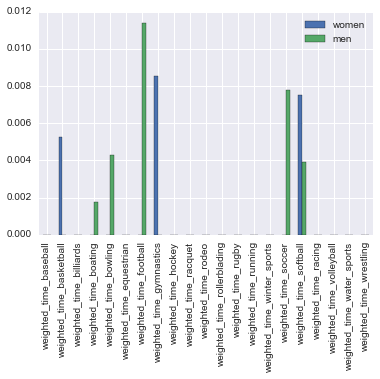

In [15]:
retired.plot(kind="bar")